In [ ]:
pip install -r Package_initialization.txt

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# we load the ResNet101 model
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# freezing the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# we add some additional layers 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  
predictions = Dense(1, activation='sigmoid')(x)  # our output layer with 1 neuron for binary classification

In [5]:
# we combine the model with the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


#model.summary()


In [6]:
# we define an image data generator for preprocessing
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)


train_dir = '../Final project new/Image data/training'
validation_dir = '../Final project new/Image data/validation'
test_dir = '../Final project new/Image data/test'

# we generate augmented images for training
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  
)

# we generate augmented images for validation
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# we generate augmented images for testing
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# here we calculate the number of steps per epoch for training and validation
train_steps_per_epoch = train_generator.samples // train_generator.batch_size
val_steps_per_epoch = validation_generator.samples // validation_generator.batch_size


print("Number of training images:", train_generator.samples)
print("Number of validation images:", validation_generator.samples)
print("Number of testing images:", test_generator.samples)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.
Number of training images: 6000
Number of validation images: 2000
Number of testing images: 2001


In [7]:
# we fit the model to the data
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,  
    validation_data=validation_generator,
    validation_steps=val_steps_per_epoch,  
    epochs=15
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 179s 897ms/step - accuracy: 0.6230 - loss: 0.6536 - val_accuracy: 0.7263 - val_loss: 0.5522
Epoch 2/15
  1/187 ━━━━━━━━━━━━━━━━━━━━ 1:35 513ms/step - accuracy: 0.8438 - loss: 0.4314

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.4314 - val_accuracy: 0.6875 - val_loss: 0.4365
Epoch 3/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 163s 861ms/step - accuracy: 0.7413 - loss: 0.5218 - val_accuracy: 0.7555 - val_loss: 0.5247
Epoch 4/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6875 - loss: 0.5041 - val_accuracy: 0.6875 - val_loss: 0.5434
Epoch 5/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 164s 864ms/step - accuracy: 0.7670 - loss: 0.4885 - val_accuracy: 0.7868 - val_loss: 0.4716
Epoch 6/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.5081 - val_accuracy: 0.8125 - val_loss: 0.4287
Epoch 7/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 164s 863ms/step - accuracy: 0.7881 - loss: 0.4588 - val_accuracy: 0.7858 - val_loss: 0.4744
Epoch 8/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7500 - loss: 0.5167 - val_accuracy: 0.7500 - val_loss: 0.4683
Epoch 9/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 163s 860ms/step - accuracy: 0.7893 - loss: 0.4393 - val_accurac

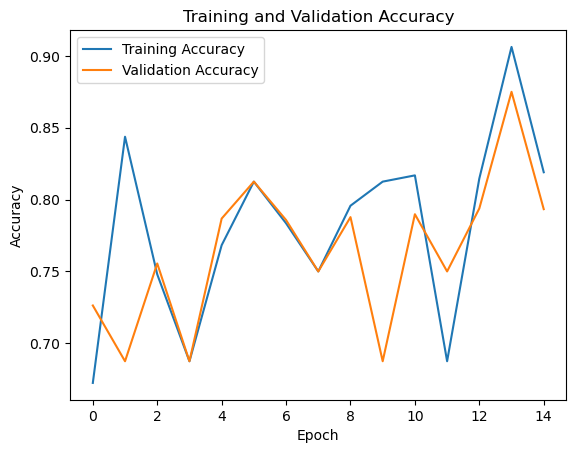

In [9]:
import matplotlib.pyplot as plt

# we plot training and validation accuracy for some visual inspection
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# we save the entire model 
model.save("resnet_model.keras")